In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

from sklearn.datasets import make_classification

In [62]:
data1,data2= make_classification(n_samples=1000,n_features=3,n_redundant=1,n_clusters_per_class=1,n_classes=2,random_state=42)

In [63]:
data1

array([[ 0.32468912,  1.68252958, -0.3811859 ],
       [ 0.99307693,  0.75594526, -1.1723519 ],
       [ 0.8044078 ,  1.35447877, -0.94852841],
       ...,
       [-1.69020155, -0.55811295,  1.99639955],
       [-1.09853881,  0.40707637,  1.29868654],
       [-0.38007109,  1.71393883,  0.4516388 ]], shape=(1000, 3))

In [64]:
data2

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,

In [65]:
data1=pd.DataFrame(data1,columns=['Feature1','Feature2','Feature3 '])
data2= pd.DataFrame(data2,columns=['Target'])

df=pd.concat([data1,data2],axis=1)
df.head()

,Feature1,Feature2,Feature3,Target
0,0.324689,1.682530,-0.381186,1
1,0.993077,0.755945,-1.172352,0
2,0.804408,1.354479,-0.948528,0
3,-0.193718,3.103090,0.233485,0
4,-1.582040,1.086506,1.871016,1


<Axes: xlabel='Feature1', ylabel='Feature2'>

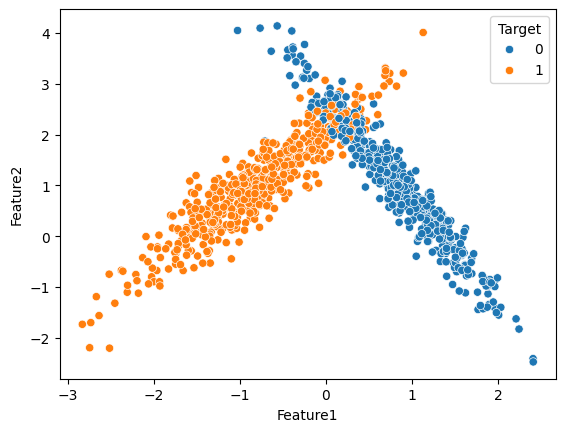

In [66]:
sns.scatterplot(x='Feature1',y='Feature2',hue='Target',data=df)

In [67]:
df.columns.tolist()

['Feature1', 'Feature2', 'Feature3 ', 'Target']

In [68]:
df.columns=df.columns.str.strip()

In [69]:
df.columns.tolist()

['Feature1', 'Feature2', 'Feature3', 'Target']

<Axes: xlabel='Feature2', ylabel='Feature3'>

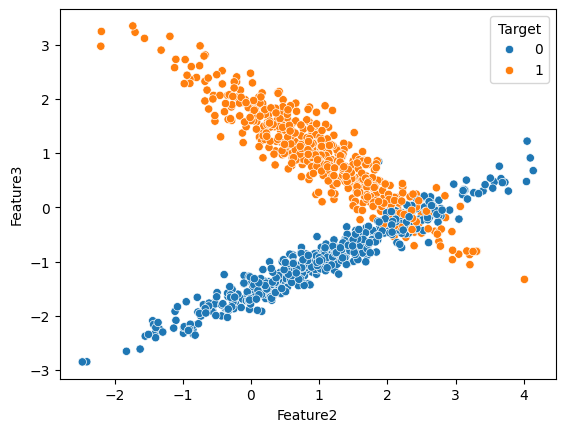

In [70]:
sns.scatterplot(x='Feature2',y='Feature3',hue='Target',data=df)

In [71]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [72]:
X.head()

,Feature1,Feature2,Feature3
0,0.324689,1.682530,-0.381186
1,0.993077,0.755945,-1.172352
2,0.804408,1.354479,-0.948528
3,-0.193718,3.103090,0.233485
4,-1.582040,1.086506,1.871016


In [73]:
y.head()

0    1
1    0
2    0
3    0
4    1
Name: Target, dtype: int64

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((750, 3), (250, 3), (750,), (250,))

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,weights='uniform',p=2,algorithm='auto')
knn.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [77]:
y_pred = knn.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

0.94


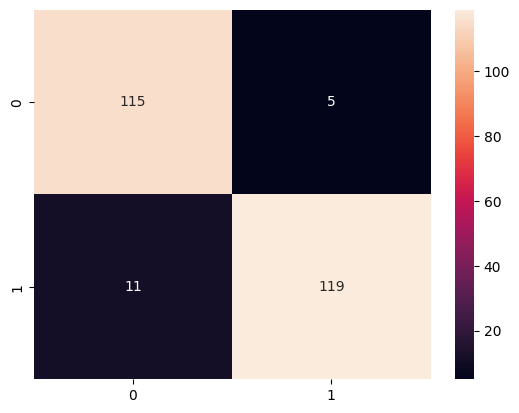

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       120
           1       0.96      0.92      0.94       130

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



In [81]:
print(round(accuracy_score(y_test,y_pred),2))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()
print(classification_report(y_test,y_pred))

In [82]:
from sklearn.model_selection import GridSearchCV


In [83]:
param_grid = {
    'n_neighbors': [1,3,5,7,9,11,13,15],
    'weights': ['uniform','distance'],
    'metric': ['euclidean','manhattan'],
    'p': [1,2,3]
}

In [84]:
grid = GridSearchCV(estimator=knn,param_grid=param_grid,cv=5,n_jobs=-1,verbose=1,scoring='accuracy')
grid.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


,estimator,KNeighborsClassifier()
,param_grid,"{'metric': ['euclidean', 'manhattan'], 'n_neighbors': [1, 3, ...], 'p': [1, 2, ...], 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,11


In [85]:
y_pred1 = grid.predict(X_test)

0.95


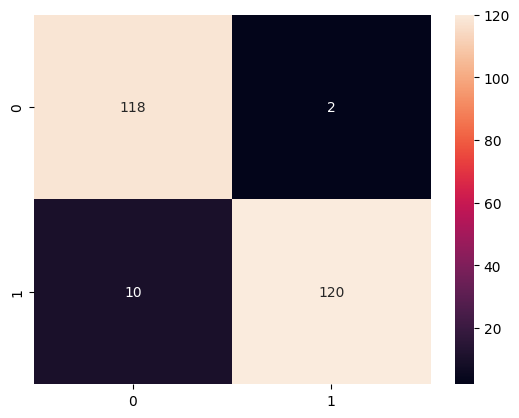

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       120
           1       0.98      0.92      0.95       130

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



In [86]:
print(round(accuracy_score(y_test,y_pred1),2))
cm = confusion_matrix(y_test,y_pred1)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()
print(classification_report(y_test,y_pred1))